# Задание 3. SVMData

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from accuracy_dependence import normalize_data

## Чтение данных из файла

In [3]:
train_data = pd.read_csv('datasets/svmdata2.txt', sep='\s+')
test_data = pd.read_csv('datasets/svmdata2test.txt', sep='\s+')
le = LabelEncoder()
le.fit(["red", "green"])
y_train = le.transform(train_data['Colors'])
y_test = le.transform(test_data['Colors'])
X_train = train_data.loc[:, ['X1', 'X2']]
X_train = normalize_data(X_train)
X_test = test_data.loc[:, ['X1', 'X2']]
X_test = normalize_data(X_test)

## Настройка сетки поиска параметров

In [4]:
clf = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
search_grid = {'n_neighbors': range(1, 40),
              'p': range(1, 40),
               'weights': ['uniform', 'distance']}
gscv = GridSearchCV(clf, param_grid=search_grid, cv=kf, n_jobs=-1, verbose=1)

In [5]:
gscv.fit(X_train, y_train)
print(pd.DataFrame(gscv.cv_results_))
print(gscv.best_params_)
print(gscv.score(X_test, y_test))

Fitting 5 folds for each of 3042 candidates, totalling 15210 fits
      mean_fit_time  std_fit_time  mean_score_time  std_score_time   
0          0.005626      0.001732         0.007580        0.005997  \
1          0.004603      0.001499         0.004005        0.000554   
2          0.004158      0.000374         0.005541        0.001241   
3          0.003869      0.000519         0.004735        0.001260   
4          0.005759      0.002796         0.004574        0.000735   
...             ...           ...              ...             ...   
3037       0.003028      0.000636         0.002998        0.000011   
3038       0.003000      0.000010         0.004182        0.001505   
3039       0.002795      0.000400         0.003040        0.000645   
3040       0.003625      0.001736         0.003602        0.000498   
3041       0.002495      0.000452         0.003582        0.000809   

     param_n_neighbors param_p param_weights   
0                    1       1       uniform 

## Графическое отображение результата

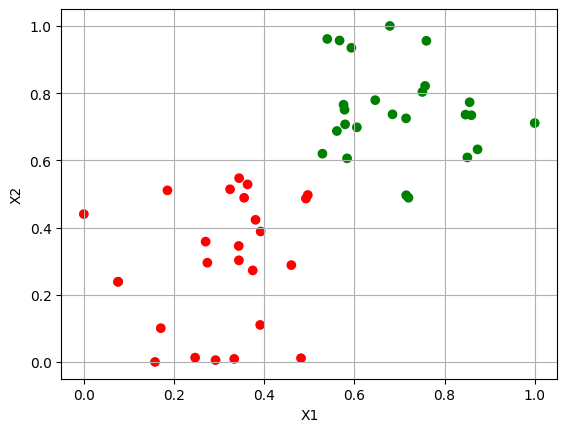

In [6]:
plt.scatter(X_test['X1'], X_test['X2'], c=le.inverse_transform(y_test))
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()